In [1]:
 #load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)

2048

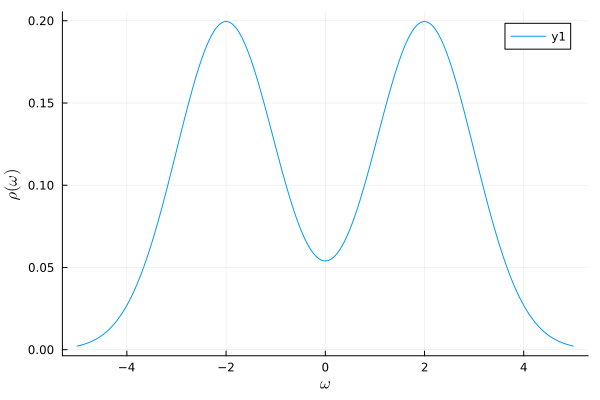

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
moments = Complex{T}.([1, 0, 5, 0, 43])

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30


In [9]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30
H=1
Iter     Function value   Gradient norm 
     0     7.584644e+00     1.536012e+01
 * time: 0.014892101287841797
     1     6.548397e+00     2.991122e-01
 * time: 1.4915940761566162
     2     5.669428e+00     2.299181e-01
 * time: 2.8600399494171143
     3     5.102782e+00     1.440176e-01
 * time: 3.9481539726257324
     4     4.959079e+00     1.017070e-01
 * time: 5.675249099731445
     5     4.953866e+00     1.010512e-01
 * time: 6.349184036254883
     6     4.907493e+00     1.181605e-01
 * time: 7.736955881118774
     7     4.835572e+00     6.345168e-02
 * time: 8.732754945755005
     8     4.800108e+00     5.407525e-02
 * time: 9.403845071792603
     9     4.782536e+00     1.451396e-02
 * time: 10.075040102005005
    10     4.781216e+00     5.098969e-03
 * time: 10.745524883270264
    11     4.781082e+00     3.073672e-03
 * time: 11.7965989112854
    12    

    65     4.089631e+00     3.124037e-05
 * time: 75.56342196464539
    66     4.089631e+00     2.349974e-05
 * time: 76.32869219779968
    67     4.089631e+00     1.818214e-05
 * time: 77.14543199539185
    68     4.089631e+00     1.398942e-05
 * time: 77.9493420124054
    69     4.089631e+00     1.087891e-05
 * time: 78.71568202972412
    70     4.089631e+00     8.072247e-06
 * time: 79.53095602989197
    71     4.089631e+00     6.311792e-06
 * time: 80.32650113105774
    72     4.089631e+00     4.632247e-06
 * time: 81.08824014663696
    73     4.089631e+00     3.641252e-06
 * time: 81.87997007369995
    74     4.089631e+00     2.661161e-06
 * time: 82.70132803916931
    75     4.089631e+00     2.098813e-06
 * time: 83.44797205924988
    76     4.089631e+00     1.552789e-06
 * time: 84.22489213943481
    77     4.089631e+00     1.207152e-06
 * time: 85.04251003265381
    78     4.089631e+00     8.991358e-07
 * time: 85.83184313774109
    79     4.089631e+00     7.048065e-07
 * time:

In [10]:
Nevanlinna.solve!(ham_nev_sol)

H=3
Iter     Function value   Gradient norm 
     0     1.446300e-01     4.376351e-09
 * time: 0.0001659393310546875
max_theta=0.581083125171767107664866760422579020474548398033687799697270192644683611507932649524916952731747140700046215339191764201463518609665240890208067690548969737233055479723752227041048181455986336477890548712524004788135789074147642827833533211542263844495398252269621007148778428782541874779009034253199623707647928923880471293082070322607291346104562500914561918787332447666612072094763377975767215796343711324725914343906810744201565007289087059463435096352732997840891930770686707873554143441519315159670849763088539605560052090891403858666807851990812234727176436432104893906390706636105367971626674773102645272915928
hardy optimization was success.
H=4
Iter     Function value   Gradient norm 
     0     1.446300e-01     7.669581e-01
 * time: 0.0001819133758544922
     1     1.071382e-01     2.967208e-01
 * time: 0.7137510776519775
     2     1.015427e-01     3.0122

     4     2.344612e-03     1.480526e-02
 * time: 3.053114175796509
     5     2.112145e-03     1.503465e-02
 * time: 3.801362991333008
     6     1.978271e-03     1.289467e-02
 * time: 4.5755980014801025
     7     1.845226e-03     9.653623e-03
 * time: 5.3578619956970215
     8     1.609744e-03     1.158413e-02
 * time: 6.580729007720947
     9     1.367447e-03     1.270250e-02
 * time: 7.808143138885498
    10     1.141689e-03     2.492374e-03
 * time: 9.170117139816284
    11     1.130471e-03     2.954950e-03
 * time: 10.382854223251343
    12     1.124874e-03     2.460756e-03
 * time: 11.61687421798706
    13     1.121701e-03     1.504380e-03
 * time: 12.889254093170166
    14     1.121203e-03     2.120409e-04
 * time: 13.873157024383545
    15     1.120711e-03     1.522803e-03
 * time: 15.605391025543213
    16     1.106577e-03     8.535606e-04
 * time: 17.65389919281006
    17     1.106011e-03     7.322218e-05
 * time: 18.898608207702637
    18     1.106005e-03     1.695889e-05


    43     1.468354e-04     9.278677e-09
 * time: 49.06620192527771
max_theta=0.693322023388804859445101285760100313902909160313932405934609374447841914454102750397476326324307511499518329759852065079801517317155089366795911356804936945770598762814354950059131771908739517658075184971017181963427332588125602402127720045808551769144529052604844406017007031901460946982900598577131327344323997807600692627341251623572553472843857948072126017454900574400911774060862791028766216701752276796120493993429235350043037131986170075326135308746744356418714296931065886673565741464495584113743281305416242590962343014157902698955120037131692671668302493777076903602591599068015039628835903997889803942976363
hardy optimization was success.
H=10
Iter     Function value   Gradient norm 
     0     1.468354e-04     1.101522e-02
 * time: 0.00017189979553222656
     1     1.400295e-04     7.976214e-03
 * time: 0.8529980182647705
     2     1.363397e-04     4.000125e-03
 * time: 1.699347972869873
     3     1.

    46     3.241439e-05     3.489627e-04
 * time: 62.29731607437134
    47     3.240779e-05     4.414181e-04
 * time: 63.72358989715576
    48     3.239829e-05     5.419342e-04
 * time: 65.19041991233826
    49     3.238357e-05     6.714330e-04
 * time: 66.65910792350769
    50     3.236252e-05     8.055276e-04
 * time: 68.14719009399414
    51     3.232989e-05     9.604953e-04
 * time: 69.6764030456543
    52     3.228250e-05     1.088916e-03
 * time: 71.31923699378967
    53     3.220514e-05     1.151313e-03
 * time: 73.0513870716095
    54     3.207727e-05     9.124345e-04
 * time: 74.64906692504883
    55     3.191615e-05     1.898007e-04
 * time: 76.1820719242096
    56     3.190326e-05     1.839032e-04
 * time: 77.23447299003601
    57     3.189954e-05     3.648114e-05
 * time: 78.2469699382782
    58     3.189937e-05     2.055329e-05
 * time: 79.76865196228027
    59     3.189932e-05     1.211686e-05
 * time: 80.73309588432312
    60     3.189931e-05     5.288201e-06
 * time: 81

H=13
Iter     Function value   Gradient norm 
     0     1.948419e-05     2.388570e-03
 * time: 0.00021386146545410156
     1     1.925002e-05     1.562490e-03
 * time: 1.591588020324707
     2     1.914758e-05     6.402211e-04
 * time: 2.6249308586120605
     3     1.904648e-05     9.356849e-04
 * time: 3.647869825363159
     4     1.901151e-05     8.164495e-04
 * time: 4.6883838176727295
     5     1.890442e-05     6.514523e-04
 * time: 5.738250970840454
     6     1.879643e-05     7.035443e-04
 * time: 6.755762815475464
     7     1.868185e-05     5.426050e-04
 * time: 7.760018825531006
     8     1.853962e-05     6.077762e-04
 * time: 8.780565023422241
     9     1.840639e-05     4.624718e-04
 * time: 9.772823810577393
    10     1.830020e-05     4.846007e-04
 * time: 10.782785892486572
    11     1.820206e-05     3.122293e-04
 * time: 11.792098045349121
    12     1.812105e-05     2.993146e-04
 * time: 12.780174970626831
    13     1.803363e-05     2.812810e-04
 * time: 14.3931429

    14     1.432439e-05     1.304574e-04
 * time: 16.320618867874146
    15     1.430631e-05     1.563464e-04
 * time: 17.37853693962097
    16     1.427895e-05     1.262141e-04
 * time: 18.982163906097412
    17     1.425324e-05     1.252135e-04
 * time: 20.04195284843445
    18     1.419520e-05     1.284827e-04
 * time: 21.6132709980011
    19     1.413893e-05     1.135636e-04
 * time: 23.162492990493774
    20     1.408476e-05     1.452818e-04
 * time: 24.731745958328247
    21     1.402717e-05     1.163201e-04
 * time: 26.351348876953125
    22     1.402189e-05     9.409740e-05
 * time: 27.934379816055298
    23     1.401935e-05     7.263578e-05
 * time: 29.594164848327637
    24     1.401537e-05     1.555002e-04
 * time: 31.21962285041809
    25     1.401155e-05     1.108521e-04
 * time: 32.914198875427246
    26     1.400969e-05     7.438598e-05
 * time: 34.54541897773743
    27     1.400752e-05     6.348067e-05
 * time: 36.163211822509766
    28     1.400496e-05     5.875731e-05

     8     1.292927e-05     2.489629e-04
 * time: 9.075783967971802
     9     1.291590e-05     2.726816e-04
 * time: 10.803044080734253
    10     1.290271e-05     2.277078e-04
 * time: 11.921395063400269
    11     1.288846e-05     2.304579e-04
 * time: 13.05560302734375
    12     1.287541e-05     1.891124e-04
 * time: 14.150983095169067
    13     1.286331e-05     1.404789e-04
 * time: 15.248728036880493
    14     1.285134e-05     1.053427e-04
 * time: 16.326608896255493
    15     1.284429e-05     1.057779e-04
 * time: 17.45924711227417
    16     1.283687e-05     6.413282e-05
 * time: 18.557677030563354
    17     1.283180e-05     8.954696e-05
 * time: 19.643963098526
    18     1.282447e-05     1.063687e-04
 * time: 21.33601188659668
    19     1.281713e-05     6.168588e-05
 * time: 23.018513917922974
    20     1.280313e-05     1.498024e-04
 * time: 24.70693588256836
    21     1.278149e-05     1.142940e-04
 * time: 26.466378927230835
    22     1.276590e-05     2.730595e-04
 

   128     1.230598e-05     1.456633e-04
 * time: 197.95214009284973
   129     1.230098e-05     7.284048e-05
 * time: 199.93273901939392
   130     1.230045e-05     6.110240e-05
 * time: 201.13098311424255
   131     1.229999e-05     2.506057e-05
 * time: 202.3947229385376
   132     1.229994e-05     1.162428e-05
 * time: 203.68037509918213
   133     1.229992e-05     1.073748e-05
 * time: 205.54951906204224
   134     1.229991e-05     4.012643e-06
 * time: 206.8256208896637
   135     1.229991e-05     2.927454e-06
 * time: 208.72329092025757
   136     1.229991e-05     2.109486e-06
 * time: 209.9902639389038
   137     1.229991e-05     1.318018e-06
 * time: 211.968327999115
   138     1.229991e-05     5.263532e-07
 * time: 213.16928505897522
   139     1.229991e-05     5.218357e-07
 * time: 215.13052201271057
   140     1.229991e-05     2.619912e-07
 * time: 216.33519291877747
   141     1.229991e-05     1.727966e-07
 * time: 218.28149390220642
   142     1.229991e-05     9.402964e-0

    90     1.200302e-05     5.055787e-05
 * time: 136.93753504753113
    91     1.200262e-05     4.306472e-05
 * time: 138.09477996826172
    92     1.200242e-05     2.717972e-05
 * time: 139.22198009490967
    93     1.200232e-05     1.966209e-05
 * time: 140.3768858909607
    94     1.200227e-05     1.267252e-05
 * time: 141.51992988586426
    95     1.200225e-05     9.527363e-06
 * time: 142.65597105026245
    96     1.200225e-05     5.702039e-06
 * time: 143.75524187088013
    97     1.200224e-05     4.585393e-06
 * time: 144.87168192863464
    98     1.200224e-05     2.631861e-06
 * time: 145.98138999938965
    99     1.200224e-05     2.061007e-06
 * time: 147.11491990089417
   100     1.200224e-05     1.280947e-06
 * time: 148.2326250076294
   101     1.200224e-05     9.883831e-07
 * time: 149.35716104507446
   102     1.200224e-05     6.110252e-07
 * time: 150.45849704742432
   103     1.200224e-05     4.857690e-07
 * time: 151.56507301330566
   104     1.200224e-05     2.840874

     8     1.198360e-05     7.444944e-05
 * time: 9.989047050476074
     9     1.198217e-05     8.159261e-05
 * time: 11.168798923492432
    10     1.198081e-05     8.189010e-05
 * time: 12.299139022827148
    11     1.197939e-05     9.016660e-05
 * time: 13.435868978500366
    12     1.197790e-05     7.679640e-05
 * time: 14.597145080566406
    13     1.197624e-05     7.033215e-05
 * time: 15.73816704750061
    14     1.197427e-05     6.693430e-05
 * time: 16.948601961135864
    15     1.197270e-05     4.259905e-05
 * time: 18.148820877075195
    16     1.197081e-05     4.734629e-05
 * time: 19.31150794029236
    17     1.196917e-05     3.993997e-05
 * time: 20.468364000320435
    18     1.196771e-05     3.114436e-05
 * time: 21.696708917617798
    19     1.196639e-05     3.319728e-05
 * time: 22.90789294242859
    20     1.196531e-05     3.288418e-05
 * time: 24.116190910339355
    21     1.196446e-05     2.020327e-05
 * time: 25.926431894302368
    22     1.196357e-05     2.669343e-

   128     1.186875e-05     3.284146e-07
 * time: 193.51849389076233
   129     1.186875e-05     3.735740e-07
 * time: 194.64958691596985
   130     1.186875e-05     4.214872e-07
 * time: 195.7720079421997
   131     1.186875e-05     4.712983e-07
 * time: 196.95818209648132
   132     1.186875e-05     5.236154e-07
 * time: 198.11606192588806
   133     1.186875e-05     5.806100e-07
 * time: 199.29058408737183
   134     1.186875e-05     6.384136e-07
 * time: 200.50516605377197
   135     1.186875e-05     7.031614e-07
 * time: 201.71062803268433
   136     1.186875e-05     7.677384e-07
 * time: 202.91897010803223
   137     1.186875e-05     8.395311e-07
 * time: 204.10879111289978
   138     1.186875e-05     9.119034e-07
 * time: 205.31014490127563
   139     1.186875e-05     9.906069e-07
 * time: 206.49634408950806
   140     1.186875e-05     1.071299e-06
 * time: 207.67582893371582
   141     1.186875e-05     1.158017e-06
 * time: 208.87820291519165
   142     1.186875e-05     1.24758

     2     1.186315e-05     7.361878e-05
 * time: 2.9951858520507812
     3     1.186273e-05     4.711173e-05
 * time: 4.395020961761475
     4     1.186244e-05     6.676579e-05
 * time: 5.640007972717285
     5     1.186222e-05     5.416210e-05
 * time: 6.889204025268555
     6     1.186193e-05     4.892986e-05
 * time: 8.127054929733276
     7     1.186160e-05     3.514521e-05
 * time: 9.33577299118042
     8     1.186124e-05     3.751232e-05
 * time: 10.540436029434204
     9     1.186088e-05     3.736064e-05
 * time: 11.761963844299316
    10     1.186052e-05     4.195084e-05
 * time: 12.993860006332397
    11     1.186010e-05     4.638446e-05
 * time: 14.202497005462646
    12     1.185972e-05     4.406858e-05
 * time: 15.419342994689941
    13     1.185935e-05     4.055432e-05
 * time: 16.639452934265137
    14     1.185885e-05     4.144666e-05
 * time: 17.879379987716675
    15     1.185835e-05     3.022292e-05
 * time: 19.07732605934143
    16     1.185784e-05     3.068644e-05


   122     1.182762e-05     4.814824e-06
 * time: 196.92053890228271
   123     1.182761e-05     4.762194e-06
 * time: 198.11170601844788
   124     1.182761e-05     2.549289e-06
 * time: 199.300607919693
   125     1.182760e-05     3.495383e-06
 * time: 200.52924704551697
   126     1.182760e-05     1.827227e-06
 * time: 201.72320103645325
   127     1.182760e-05     3.217881e-06
 * time: 202.9710750579834
   128     1.182760e-05     2.406045e-06
 * time: 204.17993307113647
   129     1.182759e-05     4.107658e-06
 * time: 205.4192509651184
   130     1.182759e-05     3.657751e-06
 * time: 206.69458484649658
   131     1.182759e-05     5.338924e-06
 * time: 207.98546695709229
   132     1.182759e-05     5.120195e-06
 * time: 209.23802185058594
   133     1.182759e-05     6.855307e-06
 * time: 210.5081799030304
   134     1.182758e-05     6.765938e-06
 * time: 211.7900788784027
   135     1.182758e-05     8.577550e-06
 * time: 213.05827689170837
   136     1.182758e-05     8.577772e-06

   242     1.182086e-05     4.700315e-07
 * time: 356.7603030204773
   243     1.182086e-05     4.904255e-07
 * time: 358.0359559059143
   244     1.182086e-05     5.186575e-07
 * time: 359.32052206993103
   245     1.182086e-05     5.407142e-07
 * time: 360.6498589515686
   246     1.182086e-05     5.711513e-07
 * time: 361.90810894966125
   247     1.182086e-05     5.950038e-07
 * time: 363.28222703933716
   248     1.182086e-05     6.278221e-07
 * time: 364.689386844635
   249     1.182086e-05     6.536127e-07
 * time: 366.0137560367584
   250     1.182086e-05     6.889998e-07
 * time: 367.32008695602417
   251     1.182086e-05     7.168780e-07
 * time: 368.63668489456177
   252     1.182086e-05     7.550354e-07
 * time: 369.9472198486328
   253     1.182086e-05     7.851615e-07
 * time: 371.2365679740906
   254     1.182086e-05     8.263066e-07
 * time: 372.514878988266
   255     1.182086e-05     8.588553e-07
 * time: 373.7940340042114
   256     1.182086e-05     9.032222e-07
 * t

   363     1.182047e-05     4.666542e-08
 * time: 516.8822519779205
   364     1.182047e-05     2.606628e-08
 * time: 518.739058971405
   365     1.182047e-05     2.480281e-08
 * time: 519.9603428840637
   366     1.182047e-05     1.483301e-08
 * time: 521.1632678508759
   367     1.182047e-05     1.403548e-08
 * time: 522.3610298633575
   368     1.182047e-05     8.313168e-09
 * time: 523.6035718917847
max_theta=0.78048460771235544112148370630279087446810493100440044065179830269152807674200803145058298349368046621493090681638354822291729362982295559335109303624526043562363794017229901131908507174281023707388708886963687452069055945433396631466204411590303980187761613906622798286943105223826236158565068639432145204391118874499610461640437152249676007891232761640383528163359643103215664120541180547667489630021529243297565231179332596068812843332034948051414920101470263085339237906925142129450034011155231102882781056480774038658476542081641215340718486405767871667106412877208167402980760

   104     1.181035e-05     3.982899e-05
 * time: 188.3555989265442
   105     1.181032e-05     3.855620e-05
 * time: 189.67499208450317
   106     1.181023e-05     4.394178e-05
 * time: 191.73752212524414
   107     1.181019e-05     4.182943e-05
 * time: 193.0053129196167
   108     1.181005e-05     5.826578e-05
 * time: 194.91910409927368
   109     1.180999e-05     5.708995e-05
 * time: 196.19209003448486
   110     1.180979e-05     6.213114e-05
 * time: 198.6136829853058
   111     1.180970e-05     6.049135e-05
 * time: 199.99628901481628
   112     1.180943e-05     8.168343e-05
 * time: 202.04598093032837
   113     1.180929e-05     8.149090e-05
 * time: 203.49784803390503
   114     1.180892e-05     8.090610e-05
 * time: 205.6429500579834
   115     1.180871e-05     8.130300e-05
 * time: 207.04732298851013
   116     1.180815e-05     9.891006e-05
 * time: 209.22916412353516
   117     1.180750e-05     9.095520e-05
 * time: 211.30116510391235
   118     1.180535e-05     8.389354e-

   224     1.179898e-05     2.389541e-07
 * time: 398.9142270088196
   225     1.179898e-05     2.904637e-07
 * time: 401.46994805336
   226     1.179898e-05     2.810332e-07
 * time: 402.7945261001587
   227     1.179898e-05     3.377971e-07
 * time: 404.8219120502472
   228     1.179898e-05     3.265588e-07
 * time: 406.1829299926758
   229     1.179898e-05     3.914037e-07
 * time: 408.182382106781
   230     1.179898e-05     3.781357e-07
 * time: 409.509192943573
   231     1.179898e-05     4.534039e-07
 * time: 411.4562680721283
   232     1.179898e-05     4.389513e-07
 * time: 412.778361082077
   233     1.179898e-05     5.252872e-07
 * time: 414.72848200798035
   234     1.179898e-05     5.100330e-07
 * time: 416.0387809276581
   235     1.179898e-05     6.066683e-07
 * time: 418.03409695625305
   236     1.179898e-05     5.893781e-07
 * time: 419.3245129585266
   237     1.179898e-05     6.990533e-07
 * time: 421.2249901294708
   238     1.179898e-05     6.789141e-07
 * time: 4

    21     1.179168e-05     1.931689e-05
 * time: 30.213531970977783
    22     1.179119e-05     1.465626e-05
 * time: 31.62002992630005
    23     1.179048e-05     2.294820e-05
 * time: 33.72328996658325
    24     1.178984e-05     1.940961e-05
 * time: 35.89587712287903
    25     1.178929e-05     2.717904e-05
 * time: 37.8264000415802
    26     1.178841e-05     1.652581e-05
 * time: 40.10076594352722
    27     1.178814e-05     1.741576e-05
 * time: 42.240395069122314
    28     1.178798e-05     1.852253e-05
 * time: 45.12109899520874
    29     1.178772e-05     2.634601e-05
 * time: 47.133383989334106
    30     1.178759e-05     9.614026e-06
 * time: 49.157859086990356
    31     1.178753e-05     7.611223e-06
 * time: 51.11570692062378
    32     1.178748e-05     1.239812e-05
 * time: 53.13713002204895
    33     1.178728e-05     3.475295e-05
 * time: 55.799479961395264
    34     1.178705e-05     1.225199e-05
 * time: 57.72595691680908
    35     1.178694e-05     1.764871e-05
 * 

   141     1.177973e-05     8.268473e-06
 * time: 229.24650692939758
   142     1.177973e-05     8.553808e-06
 * time: 230.54886412620544
   143     1.177973e-05     8.877977e-06
 * time: 231.84714603424072
   144     1.177973e-05     9.175505e-06
 * time: 233.15089106559753
   145     1.177973e-05     9.514685e-06
 * time: 234.4511740207672
   146     1.177973e-05     9.825209e-06
 * time: 235.8108320236206
   147     1.177973e-05     1.017989e-05
 * time: 237.65679693222046
   148     1.177972e-05     1.050425e-05
 * time: 238.96902108192444
   149     1.177972e-05     1.087496e-05
 * time: 240.29985904693604
   150     1.177972e-05     1.121389e-05
 * time: 241.62014508247375
   151     1.177972e-05     1.160145e-05
 * time: 242.94927406311035
   152     1.177972e-05     1.195559e-05
 * time: 244.23324394226074
   153     1.177972e-05     1.236104e-05
 * time: 245.49228191375732
   154     1.177972e-05     1.273109e-05
 * time: 246.7457160949707
   155     1.177972e-05     1.315552e

   261     1.177694e-05     2.842432e-05
 * time: 418.720575094223
   262     1.177691e-05     3.447759e-05
 * time: 420.7385449409485
   263     1.177689e-05     3.332985e-05
 * time: 422.04076290130615
   264     1.177683e-05     3.972029e-05
 * time: 424.62192702293396
   265     1.177681e-05     3.841281e-05
 * time: 425.88947796821594
   266     1.177673e-05     4.470588e-05
 * time: 427.90236592292786
   267     1.177670e-05     4.377803e-05
 * time: 429.2015640735626
   268     1.177660e-05     5.481378e-05
 * time: 431.07122802734375
   269     1.177655e-05     5.349447e-05
 * time: 432.41708612442017
   270     1.177641e-05     5.976357e-05
 * time: 434.2939360141754
   271     1.177634e-05     5.833474e-05
 * time: 435.5226049423218
   272     1.177615e-05     7.376482e-05
 * time: 437.361447095871
   273     1.177605e-05     7.343521e-05
 * time: 438.6981599330902
   274     1.177577e-05     8.075753e-05
 * time: 440.62512493133545
   275     1.177563e-05     7.953085e-05
 *

   382     1.176684e-05     8.647297e-07
 * time: 586.2747271060944
   383     1.176684e-05     8.695710e-07
 * time: 587.7257840633392
   384     1.176684e-05     9.215771e-07
 * time: 588.9530880451202
   385     1.176684e-05     9.268162e-07
 * time: 590.213376045227
   386     1.176684e-05     9.815804e-07
 * time: 591.4411768913269
   387     1.176684e-05     9.872612e-07
 * time: 592.6500730514526
   388     1.176684e-05     1.044915e-06
 * time: 594.0315840244293
   389     1.176684e-05     1.051067e-06
 * time: 595.2614390850067
   390     1.176684e-05     1.111760e-06
 * time: 597.2159149646759
   391     1.176684e-05     1.118393e-06
 * time: 598.4912910461426
   392     1.176684e-05     1.182304e-06
 * time: 599.7745881080627
   393     1.176684e-05     1.189427e-06
 * time: 601.0591490268707
   394     1.176684e-05     1.256755e-06
 * time: 602.4412980079651
   395     1.176684e-05     1.264390e-06
 * time: 603.7101650238037
   396     1.176684e-05     1.335338e-06
 * time:

   503     1.176673e-05     3.028599e-05
 * time: 747.952131986618
   504     1.176672e-05     3.225391e-05
 * time: 749.8577659130096
   505     1.176671e-05     3.256981e-05
 * time: 751.7149620056152
   506     1.176669e-05     3.478980e-05
 * time: 753.6021440029144
   507     1.176668e-05     3.516774e-05
 * time: 754.8920750617981
   508     1.176666e-05     3.770971e-05
 * time: 756.7332599163055
   509     1.176664e-05     3.820913e-05
 * time: 757.9841020107269
   510     1.176660e-05     4.112516e-05
 * time: 759.9105889797211
   511     1.176656e-05     4.198404e-05
 * time: 761.7713680267334
   512     1.176643e-05     4.424950e-05
 * time: 763.7053260803223
   513     1.176585e-05     4.288404e-05
 * time: 766.2507219314575
   514     1.176559e-05     3.926201e-05
 * time: 767.6822979450226
   515     1.176528e-05     3.492907e-05
 * time: 768.9330151081085
   516     1.176508e-05     2.356417e-05
 * time: 770.2846269607544
   517     1.176500e-05     1.709409e-05
 * time:

    55     1.176058e-05     1.430430e-05
 * time: 93.49098587036133
    56     1.176054e-05     1.336825e-05
 * time: 94.75872087478638
    57     1.176051e-05     1.473351e-05
 * time: 96.65628790855408
    58     1.176048e-05     1.424323e-05
 * time: 98.76314401626587
    59     1.176045e-05     1.603198e-05
 * time: 100.91618299484253
    60     1.176040e-05     1.603922e-05
 * time: 102.98366689682007
    61     1.176030e-05     1.805372e-05
 * time: 105.16839981079102
    62     1.176005e-05     1.392860e-05
 * time: 107.30960988998413
    63     1.175968e-05     1.491038e-05
 * time: 109.86909794807434
    64     1.175952e-05     1.040938e-05
 * time: 111.78903293609619
    65     1.175944e-05     1.611441e-05
 * time: 113.66388702392578
    66     1.175937e-05     1.181840e-05
 * time: 115.57055497169495
    67     1.175928e-05     1.098280e-05
 * time: 117.48970580101013
    68     1.175923e-05     1.571112e-05
 * time: 119.52451395988464
    69     1.175920e-05     1.108015e-

   175     1.175570e-05     8.011146e-06
 * time: 296.04961800575256
   176     1.175570e-05     7.636615e-06
 * time: 297.4560809135437
   177     1.175570e-05     8.823007e-06
 * time: 299.5016360282898
   178     1.175570e-05     8.449988e-06
 * time: 300.97618198394775
   179     1.175570e-05     9.702843e-06
 * time: 303.04644203186035
   180     1.175570e-05     9.328427e-06
 * time: 304.4860258102417
   181     1.175569e-05     1.063345e-05
 * time: 306.61501693725586
   182     1.175569e-05     1.024889e-05
 * time: 307.9985649585724
   183     1.175569e-05     1.163439e-05
 * time: 310.46809482574463
   184     1.175569e-05     1.124538e-05
 * time: 311.7081618309021
   185     1.175569e-05     1.271192e-05
 * time: 313.57141280174255
   186     1.175568e-05     1.231718e-05
 * time: 314.8329780101776
   187     1.175568e-05     1.386061e-05
 * time: 316.7892198562622
   188     1.175568e-05     1.345399e-05
 * time: 318.05122995376587
   189     1.175567e-05     1.509202e-05


   295     1.175061e-05     7.530789e-06
 * time: 504.33488297462463
   296     1.175061e-05     8.495110e-06
 * time: 506.6184129714966
   297     1.175061e-05     8.242336e-06
 * time: 508.22346687316895
   298     1.175061e-05     9.277482e-06
 * time: 510.4203259944916
   299     1.175061e-05     9.010837e-06
 * time: 511.7137858867645
   300     1.175061e-05     1.012284e-05
 * time: 513.7414100170135
   301     1.175060e-05     9.839325e-06
 * time: 515.3660988807678
   302     1.175060e-05     1.102870e-05
 * time: 517.4936108589172
   303     1.175060e-05     1.072608e-05
 * time: 518.9606509208679
   304     1.175060e-05     1.201067e-05
 * time: 520.9582479000092
   305     1.175060e-05     1.169072e-05
 * time: 522.4706468582153
   306     1.175059e-05     1.307180e-05
 * time: 524.5301349163055
   307     1.175059e-05     1.273341e-05
 * time: 526.0017058849335
   308     1.175059e-05     1.422047e-05
 * time: 528.0936899185181
   309     1.175059e-05     1.386151e-05
 * ti

   416     1.173432e-05     1.196859e-07
 * time: 689.1166479587555
   417     1.173432e-05     1.442205e-07
 * time: 690.4203670024872
   418     1.173432e-05     1.364033e-07
 * time: 691.7483108043671
   419     1.173432e-05     1.609871e-07
 * time: 693.0959079265594
   420     1.173432e-05     1.545113e-07
 * time: 694.4664459228516
   421     1.173432e-05     1.791368e-07
 * time: 695.808287858963
   422     1.173432e-05     1.741334e-07
 * time: 697.1152718067169
   423     1.173432e-05     1.986510e-07
 * time: 698.5180079936981
   424     1.173432e-05     1.939113e-07
 * time: 699.8170058727264
   425     1.173432e-05     2.184398e-07
 * time: 701.264289855957
   426     1.173432e-05     2.137586e-07
 * time: 702.628643989563
   427     1.173432e-05     2.387794e-07
 * time: 704.2560019493103
   428     1.173432e-05     2.347079e-07
 * time: 705.4043200016022
   429     1.173432e-05     2.599839e-07
 * time: 706.6126999855042
   430     1.173432e-05     2.562384e-07
 * time: 7

   537     1.173432e-05     3.987947e-06
 * time: 848.446977853775
   538     1.173432e-05     4.004144e-06
 * time: 849.7997159957886
   539     1.173432e-05     4.148924e-06
 * time: 851.1352949142456
   540     1.173432e-05     4.165838e-06
 * time: 852.5247440338135
   541     1.173432e-05     4.315907e-06
 * time: 853.8351428508759
   542     1.173432e-05     4.333564e-06
 * time: 855.2581298351288
   543     1.173432e-05     4.489123e-06
 * time: 856.5871968269348
   544     1.173432e-05     4.507550e-06
 * time: 858.0001718997955
   545     1.173432e-05     4.668808e-06
 * time: 859.3714430332184
   546     1.173432e-05     4.688034e-06
 * time: 860.7357938289642
   547     1.173432e-05     4.855209e-06
 * time: 862.120609998703
   548     1.173432e-05     4.875262e-06
 * time: 863.4895558357239
   549     1.173432e-05     5.048579e-06
 * time: 864.8952968120575
   550     1.173432e-05     5.069491e-06
 * time: 866.4859218597412
   551     1.173432e-05     5.249184e-06
 * time: 

   658     1.173414e-05     4.027055e-05
 * time: 1009.857668876648
   659     1.173413e-05     4.172203e-05
 * time: 1011.139720916748
   660     1.173412e-05     4.190723e-05
 * time: 1012.4746429920197
   661     1.173411e-05     4.342606e-05
 * time: 1013.7979989051819
   662     1.173410e-05     4.361907e-05
 * time: 1015.115562915802
   663     1.173409e-05     4.520951e-05
 * time: 1016.7318940162659
   664     1.173408e-05     4.541070e-05
 * time: 1017.9157319068909
   665     1.173407e-05     4.707744e-05
 * time: 1019.1102409362793
   666     1.173406e-05     4.728725e-05
 * time: 1020.288516998291
   667     1.173405e-05     4.903548e-05
 * time: 1021.4946758747101
   668     1.173404e-05     4.925437e-05
 * time: 1022.688866853714
   669     1.173403e-05     5.108989e-05
 * time: 1023.8852210044861
   670     1.173402e-05     5.131836e-05
 * time: 1025.1528799533844
   671     1.173400e-05     5.324769e-05
 * time: 1026.4701888561249
   672     1.173399e-05     5.348628e-0

    17     1.171832e-05     1.335303e-05
 * time: 22.41106605529785
    18     1.171827e-05     1.667157e-05
 * time: 23.771851062774658
    19     1.171824e-05     1.435570e-05
 * time: 25.041189193725586
    20     1.171820e-05     1.061129e-05
 * time: 26.30478000640869
    21     1.171817e-05     8.094402e-06
 * time: 27.54283905029297
    22     1.171813e-05     7.681316e-06
 * time: 28.78518509864807
    23     1.171810e-05     8.884334e-06
 * time: 30.01532506942749
    24     1.171808e-05     5.771208e-06
 * time: 31.247730016708374
    25     1.171806e-05     8.931907e-06
 * time: 32.47995400428772
    26     1.171804e-05     7.833571e-06
 * time: 33.70568799972534
    27     1.171802e-05     4.785421e-06
 * time: 34.94437503814697
    28     1.171801e-05     8.416551e-06
 * time: 36.82748317718506
    29     1.171799e-05     8.056453e-06
 * time: 38.15979504585266
    30     1.171797e-05     5.901780e-06
 * time: 39.50648212432861
    31     1.171796e-05     5.506010e-06
 * t

   137     1.171772e-05     5.742456e-07
 * time: 225.0278000831604
   138     1.171772e-05     4.257353e-07
 * time: 226.3150610923767
   139     1.171772e-05     6.306242e-07
 * time: 228.35844898223877
   140     1.171772e-05     4.872942e-07
 * time: 230.02678608894348
   141     1.171772e-05     7.073542e-07
 * time: 231.88518619537354
   142     1.171772e-05     5.535748e-07
 * time: 233.11026406288147
   143     1.171772e-05     7.899413e-07
 * time: 234.9759111404419
   144     1.171772e-05     6.257926e-07
 * time: 236.24809408187866
   145     1.171772e-05     8.611787e-07
 * time: 238.09770512580872
   146     1.171772e-05     7.019182e-07
 * time: 239.29663801193237
   147     1.171772e-05     9.159519e-07
 * time: 240.50240516662598
   148     1.171772e-05     7.795732e-07
 * time: 241.70068097114563
   149     1.171772e-05     9.613701e-07
 * time: 242.95742201805115
   150     1.171772e-05     8.556953e-07
 * time: 244.2030529975891
   151     1.171772e-05     1.009889e-

   257     1.171764e-05     4.036134e-06
 * time: 410.1048140525818
   258     1.171764e-05     8.767905e-07
 * time: 411.3702280521393
   259     1.171764e-05     4.039969e-06
 * time: 413.23692417144775
   260     1.171764e-05     1.074374e-06
 * time: 414.52653908729553
   261     1.171764e-05     4.383124e-06
 * time: 416.37347412109375
   262     1.171763e-05     1.565700e-06
 * time: 417.6033990383148
   263     1.171763e-05     4.678362e-06
 * time: 419.4882311820984
   264     1.171763e-05     2.170485e-06
 * time: 420.8058111667633
   265     1.171763e-05     4.699177e-06
 * time: 422.72157406806946
   266     1.171763e-05     2.697349e-06
 * time: 424.05251598358154
   267     1.171762e-05     4.518161e-06
 * time: 425.7643311023712
   268     1.171762e-05     3.051230e-06
 * time: 426.9950761795044
   269     1.171762e-05     4.226682e-06
 * time: 428.2162780761719
   270     1.171762e-05     3.208402e-06
 * time: 429.4501450061798
   271     1.171762e-05     3.862810e-06
 *

   378     1.171760e-05     1.046972e-06
 * time: 577.7676930427551
   379     1.171760e-05     1.134936e-06
 * time: 579.6841421127319
   380     1.171760e-05     1.113145e-06
 * time: 580.9883301258087
   381     1.171760e-05     1.205571e-06
 * time: 582.8799149990082
   382     1.171760e-05     1.181704e-06
 * time: 584.1364259719849
   383     1.171760e-05     1.277880e-06
 * time: 586.1075601577759
   384     1.171760e-05     1.252210e-06
 * time: 587.4008491039276
   385     1.171760e-05     1.351229e-06
 * time: 589.3293781280518
   386     1.171760e-05     1.324242e-06
 * time: 590.5948770046234
   387     1.171760e-05     1.425757e-06
 * time: 593.0037851333618
   388     1.171760e-05     1.397595e-06
 * time: 594.2577550411224
   389     1.171760e-05     1.500963e-06
 * time: 596.1752490997314
   390     1.171760e-05     1.471634e-06
 * time: 597.5180871486664
   391     1.171760e-05     1.574641e-06
 * time: 599.4456930160522
   392     1.171760e-05     1.544514e-06
 * time

   499     1.171759e-05     6.164287e-07
 * time: 746.7876040935516
   500     1.171759e-05     6.584012e-07
 * time: 748.5906391143799
   501     1.171759e-05     5.463721e-07
 * time: 749.8186039924622
   502     1.171759e-05     6.014748e-07
 * time: 751.0378420352936
   503     1.171759e-05     4.776402e-07
 * time: 752.2761220932007
   504     1.171759e-05     5.372672e-07
 * time: 753.5304629802704
   505     1.171759e-05     4.117281e-07
 * time: 754.7599101066589
   506     1.171759e-05     4.686806e-07
 * time: 756.0036962032318
   507     1.171759e-05     3.486240e-07
 * time: 757.2140960693359
   508     1.171759e-05     4.001297e-07
 * time: 758.4237501621246
   509     1.171759e-05     2.872493e-07
 * time: 759.7100830078125
   510     1.171759e-05     3.368694e-07
 * time: 760.977625131607
   511     1.171759e-05     2.266109e-07
 * time: 762.3250620365143
   512     1.171759e-05     2.845901e-07
 * time: 763.6413769721985
   513     1.171759e-05     1.671628e-07
 * time:

H=23
Iter     Function value   Gradient norm 
     0     1.171759e-05     1.708875e-05
 * time: 0.0001819133758544922
     1     1.171755e-05     3.462436e-05
 * time: 1.2595720291137695
     2     1.171748e-05     3.398542e-05
 * time: 2.5325260162353516
     3     1.171744e-05     3.114929e-05
 * time: 3.8306820392608643
     4     1.171736e-05     2.890685e-05
 * time: 5.6188130378723145
     5     1.171729e-05     2.823355e-05
 * time: 6.918150901794434
     6     1.171721e-05     2.625633e-05
 * time: 8.215047836303711
     7     1.171713e-05     2.293000e-05
 * time: 9.523803949356079
     8     1.171706e-05     1.738288e-05
 * time: 10.816673994064331
     9     1.171699e-05     2.292266e-05
 * time: 12.09748101234436
    10     1.171692e-05     1.822341e-05
 * time: 13.40288496017456
    11     1.171687e-05     1.942964e-05
 * time: 14.757865905761719
    12     1.171683e-05     2.228611e-05
 * time: 16.251580953598022
    13     1.171678e-05     2.654229e-05
 * time: 18.271520

   119     1.170127e-05     2.133702e-05
 * time: 197.3222279548645
   120     1.170112e-05     2.092173e-05
 * time: 199.32289004325867
   121     1.170105e-05     1.527290e-05
 * time: 200.64841604232788
   122     1.170096e-05     2.716311e-05
 * time: 202.00609302520752
   123     1.170087e-05     1.308660e-05
 * time: 203.36027598381042
   124     1.170078e-05     2.598530e-05
 * time: 205.23383784294128
   125     1.170069e-05     1.224830e-05
 * time: 206.5287458896637
   126     1.170060e-05     2.443068e-05
 * time: 207.89823484420776
   127     1.170051e-05     8.010064e-06
 * time: 209.22141885757446
   128     1.170043e-05     2.216624e-05
 * time: 210.66787481307983
   129     1.170037e-05     4.308711e-06
 * time: 212.1293430328369
   130     1.170031e-05     1.937294e-05
 * time: 213.45624685287476
   131     1.170027e-05     3.562792e-06
 * time: 214.74724292755127
   132     1.170023e-05     1.707693e-05
 * time: 216.02138495445251
   133     1.170020e-05     4.305538e

   239     1.169384e-05     1.192958e-05
 * time: 371.38307094573975
   240     1.169381e-05     8.246128e-06
 * time: 372.82638001441956
   241     1.169378e-05     1.200969e-05
 * time: 374.24847197532654
   242     1.169375e-05     8.430860e-06
 * time: 375.641783952713
   243     1.169373e-05     1.262613e-05
 * time: 377.16480898857117
   244     1.169370e-05     9.660996e-06
 * time: 378.6227009296417
   245     1.169368e-05     1.372803e-05
 * time: 380.54405403137207
   246     1.169365e-05     1.116459e-05
 * time: 381.8693778514862
   247     1.169362e-05     1.518369e-05
 * time: 383.1807289123535
   248     1.169359e-05     1.283381e-05
 * time: 384.5923080444336
   249     1.169356e-05     1.681286e-05
 * time: 386.0394480228424
   250     1.169352e-05     1.460712e-05
 * time: 387.36909198760986
   251     1.169349e-05     1.845598e-05
 * time: 388.6257688999176
   252     1.169345e-05     1.644705e-05
 * time: 390.04514598846436
   253     1.169342e-05     2.001014e-05
 

   359     1.168911e-05     4.830975e-05
 * time: 545.3079679012299
   360     1.168906e-05     4.809971e-05
 * time: 546.7061359882355
   361     1.168902e-05     4.803258e-05
 * time: 548.1249248981476
   362     1.168898e-05     4.781768e-05
 * time: 549.4837419986725
   363     1.168893e-05     4.772931e-05
 * time: 550.9545888900757
   364     1.168889e-05     4.750449e-05
 * time: 552.3881058692932
   365     1.168885e-05     4.739616e-05
 * time: 553.8510899543762
   366     1.168880e-05     4.715395e-05
 * time: 555.6240448951721
   367     1.168876e-05     4.703254e-05
 * time: 556.9255058765411
   368     1.168872e-05     4.676300e-05
 * time: 558.2034199237823
   369     1.168867e-05     4.664117e-05
 * time: 559.5111589431763
   370     1.168863e-05     4.633190e-05
 * time: 560.8001458644867
   371     1.168859e-05     4.622738e-05
 * time: 562.1091678142548
   372     1.168855e-05     4.586352e-05
 * time: 563.3992209434509
   373     1.168851e-05     4.579767e-05
 * time

   480     1.168602e-05     1.847031e-05
 * time: 718.3455319404602
   481     1.168600e-05     1.911153e-05
 * time: 719.8665289878845
   482     1.168597e-05     1.920958e-05
 * time: 721.2602388858795
   483     1.168595e-05     1.973584e-05
 * time: 722.73779296875
   484     1.168593e-05     1.988922e-05
 * time: 724.0601968765259
   485     1.168591e-05     2.034345e-05
 * time: 725.3383979797363
   486     1.168588e-05     2.051147e-05
 * time: 726.6348378658295
   487     1.168586e-05     2.092942e-05
 * time: 728.0712509155273
   488     1.168584e-05     2.108037e-05
 * time: 729.4874608516693
   489     1.168581e-05     2.149341e-05
 * time: 730.9417538642883
   490     1.168579e-05     2.160145e-05
 * time: 732.6877620220184
   491     1.168577e-05     2.203046e-05
 * time: 734.1542308330536
   492     1.168574e-05     2.208108e-05
 * time: 735.4583239555359
   493     1.168572e-05     2.253604e-05
 * time: 736.7688059806824
   494     1.168570e-05     2.252550e-05
 * time: 

   601     1.168373e-05     6.332542e-06
 * time: 888.460098028183
   602     1.168373e-05     6.008113e-06
 * time: 889.8955059051514
   603     1.168372e-05     5.638160e-06
 * time: 891.7778308391571
   604     1.168371e-05     5.440984e-06
 * time: 893.0595619678497
   605     1.168371e-05     5.023660e-06
 * time: 894.3613908290863
   606     1.168370e-05     4.946647e-06
 * time: 895.6903948783875
   607     1.168369e-05     4.523210e-06
 * time: 896.9798328876495
   608     1.168369e-05     4.548602e-06
 * time: 898.3023209571838
   609     1.168368e-05     4.173519e-06
 * time: 899.6539459228516
   610     1.168367e-05     4.275410e-06
 * time: 900.9974718093872
   611     1.168367e-05     4.010921e-06
 * time: 902.3517498970032
   612     1.168366e-05     4.154713e-06
 * time: 903.6887848377228
   613     1.168366e-05     4.052109e-06
 * time: 905.1077170372009
   614     1.168365e-05     4.215775e-06
 * time: 906.5229399204254
   615     1.168364e-05     4.265257e-06
 * time:

   722     1.168290e-05     8.922501e-06
 * time: 1056.0576238632202
   723     1.168289e-05     9.102400e-06
 * time: 1057.3316428661346
   724     1.168289e-05     8.460778e-06
 * time: 1058.6873769760132
   725     1.168289e-05     8.684098e-06
 * time: 1060.0307738780975
   726     1.168289e-05     7.994302e-06
 * time: 1061.315062046051
   727     1.168288e-05     8.256675e-06
 * time: 1062.6439499855042
   728     1.168288e-05     7.524696e-06
 * time: 1063.9432020187378
   729     1.168288e-05     7.819244e-06
 * time: 1065.2625670433044
   730     1.168287e-05     7.053768e-06
 * time: 1066.5603530406952
   731     1.168287e-05     7.371488e-06
 * time: 1067.840726852417
   732     1.168287e-05     6.583559e-06
 * time: 1069.224203824997
   733     1.168287e-05     6.913983e-06
 * time: 1070.7043159008026
   734     1.168286e-05     6.116320e-06
 * time: 1072.1350710391998
   735     1.168286e-05     6.448441e-06
 * time: 1073.5545690059662
   736     1.168286e-05     5.654414e

   842     1.168266e-05     6.081752e-06
 * time: 1224.4229559898376
   843     1.168266e-05     6.169607e-06
 * time: 1225.7479929924011
   844     1.168266e-05     5.935424e-06
 * time: 1227.0373318195343
   845     1.168266e-05     6.029852e-06
 * time: 1228.3414318561554
   846     1.168266e-05     5.780080e-06
 * time: 1229.6517689228058
   847     1.168266e-05     5.880919e-06
 * time: 1231.062903881073
   848     1.168265e-05     5.616372e-06
 * time: 1232.4245789051056
   849     1.168265e-05     5.723286e-06
 * time: 1233.8304760456085
   850     1.168265e-05     5.445627e-06
 * time: 1235.1953899860382
   851     1.168265e-05     5.558070e-06
 * time: 1236.5701370239258
   852     1.168265e-05     5.268465e-06
 * time: 1237.9432899951935
   853     1.168265e-05     5.384799e-06
 * time: 1239.385036945343
   854     1.168265e-05     5.085392e-06
 * time: 1241.092658996582
   855     1.168265e-05     5.203787e-06
 * time: 1242.6017858982086
   856     1.168264e-05     4.897314e

   962     1.168256e-05     1.073747e-05
 * time: 1389.5112228393555
   963     1.168256e-05     1.081956e-05
 * time: 1390.881353855133
   964     1.168256e-05     1.112706e-05
 * time: 1392.2487800121307
   965     1.168256e-05     1.122410e-05
 * time: 1393.6137869358063
   966     1.168256e-05     1.152019e-05
 * time: 1394.976212978363
   967     1.168255e-05     1.163263e-05
 * time: 1396.334095954895
   968     1.168255e-05     1.191717e-05
 * time: 1397.7001678943634
   969     1.168255e-05     1.204544e-05
 * time: 1399.060043811798
   970     1.168255e-05     1.231836e-05
 * time: 1400.4363298416138
   971     1.168255e-05     1.246282e-05
 * time: 1401.8606078624725
   972     1.168255e-05     1.272412e-05
 * time: 1403.2270529270172
   973     1.168255e-05     1.288504e-05
 * time: 1404.5930128097534
   974     1.168254e-05     1.313476e-05
 * time: 1405.9533469676971
   975     1.168254e-05     1.331225e-05
 * time: 1407.3179819583893
   976     1.168254e-05     1.355050e-

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

┌ Error: Failed to revise /home/kosuke/work/Nevanlinna.jl/src/Nevanlinna.jl
│   exception =
│    type Entry has no field name
│    Stacktrace:
│      [1] getproperty(x::Comonicon.AST.Entry, f::Symbol)
│        @ Base Base.jl:38
│      [2] print_name(io::IOBuffer, cmd::Comonicon.AST.Entry, t::Comonicon.AST.Terminal)
│        @ Comonicon.AST ~/.julia/packages/Comonicon/HDhA6/src/ast/printing.jl:176
│      [3] print_with_brief(f::typeof(Comonicon.AST.print_name), io::IOContext{IOBuffer}, cmd::Comonicon.AST.Entry, t::Comonicon.AST.Terminal)
│        @ Comonicon.AST ~/.julia/packages/Comonicon/HDhA6/src/ast/printing.jl:269
│      [4] print_name_brief(io::IOContext{IOBuffer}, cmd::Comonicon.AST.Entry, t::Comonicon.AST.Terminal)
│        @ Comonicon.AST ~/.julia/packages/Comonicon/HDhA6/src/ast/printing.jl:264
│      [5] print_body(io::IOContext{IOBuffer}, cmd::Comonicon.AST.NodeCommand, t::Comonicon.AST.Terminal)
│        @ Comonicon.AST ~/.julia/packages/Comonicon/HDhA6/src/ast/printing.jl:

N_imag is setted as 33


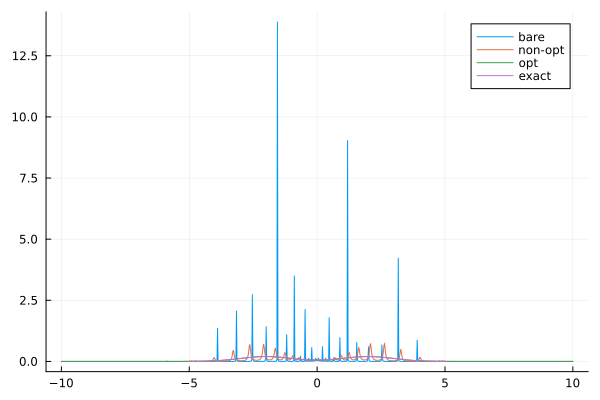

In [12]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="bare")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi,label="non-opt")
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi,label="opt")
plot!(omegas, rho.(omegas),label="exact")